# Final Exam Challenge for Microsoft Professional Program - Principles of Machine Learning with Python

## Part 1 - Data Exploration

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## Q1-Q5 - Report Some Summary Statistics on Average Montly Spend

In [49]:
avgmonthlyspend = pd.read_csv('/home/nbuser/library/FinalExam/AW_AveMonthSpend.csv')
avgmonthlyspend.describe()
avgmonthlyspend.head()

CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95

## Q6 - Analyze the Distribution of Values for Bike Buyers

In [35]:
bikebuyer = pd.read_csv('/home/nbuser/library/FinalExam/AW_BikeBuyer.csv')
bikebuyer.describe()

CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000

In [36]:
bikebuyer.columns

Index(['CustomerID', 'BikeBuyer'], dtype='object')

In [37]:
bikebuyer.head()

CustomerID  BikeBuyer
0       11000          0
1       11001          1
2       11002          0
3       11003          0
4       11004          1

* A Histogram is an ideal candidate for looking at the distribution here

In [38]:
def plot_histogram(df, cols, bins = 10, y_axis='Y Axis Title'):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        df[col].plot.hist(ax = ax, bins = bins)
        ax.set_title('Histogram of '+ col)
        ax.set_xlabel(col)
        ax.set_ylabel(y_axis)
        plt.show()

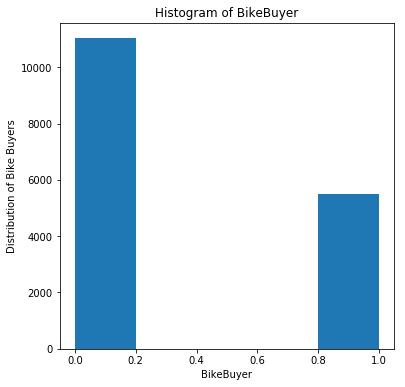

In [39]:
plot_histogram(bikebuyer,['BikeBuyer'],5,'Distribution of Bike Buyers')

In [40]:
bikebuyer[bikebuyer['BikeBuyer'] == 0].count()

CustomerID    11030
BikeBuyer     11030
dtype: int64

In [41]:
bikebuyer[bikebuyer['BikeBuyer'] == 1].count()

CustomerID    5489
BikeBuyer     5489
dtype: int64

In [42]:
customers = pd.read_csv('/home/nbuser/library/FinalExam/AdvWorksCusts.csv')
customers.describe()

CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  16519.000000   16519.000000     16519.000000          16519.000000   
mean   20234.225195       0.673891         1.500999              0.992009   
std     5342.515987       0.468802         1.138962              1.515048   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15604.500000       0.000000         1.000000              0.000000   
50%    20221.000000       1.000000         2.000000              0.000000   
75%    24860.500000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome  
count   16519.000000   16519.000000  
mean        2.006235   78122.511532  
std         1.682736   39710.985718  
min         0.000000    9482.000000  
25%         0.000000   47807.500000  
50%         2.000000   76120.000000  
75%         3.000000  105194.500000  
max         5.000000  196511.000000

In [43]:
customers.head()

CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional      M             S   
2      ...       1965-08-12  Bachelors   Professional      M             M   
3      ...       1968-02-15  Bachelors   Professional      F             S   
4      ...       1968-08-08  Bachelors   Professional      F             S   

  HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  TotalChildren  \
0             1               0                    0              2   
1             0               1                    3              3   
2             1               1                    3              3   
3             0               1                    0              0   
4             1               4                    5              5   

   YearlyIncome  
0        137947  
1        101141  
2         91945  
3         86688  
4         92771  

[5 rows x 23 columns]

## Sort Average Yearly Income, Grouped By Occupation

In [44]:
customers.groupby(['Occupation'])['YearlyIncome'].median()

Occupation
Clerical           49387.0
Management        118780.0
Manual             21722.5
Professional       99046.0
Skilled Manual     66481.0
Name: YearlyIncome, dtype: float64

## Q: Based on their age at the time when the data was collected (1st January 1998), which group of customers accounts for the highest AveMonthSpend values?

# Create a function that returns age range based on date of birth

In [45]:
from datetime import datetime

def age(birth_date):
    dob = datetime.strptime(birth_date, '%Y-%m-%d')
    ref_date = datetime.strptime('1998-01-01', '%Y-%m-%d')
    years = ref_date.year - dob.year
    if ref_date.month < dob.month or (ref_date.month == dob.month and ref_date.day < dob.day):
        years -= 1
    return years

def age_range(birth_date):
    person_age = age(birth_date)
    if  person_age < 25:
        return '<25'
    elif person_age >= 25 and person_age < 45:
        return '25-45'
    elif person_age >= 45 and person_age < 55:
        return '45-55'
    else:
        return '>55'

In [46]:
customers['AgeGroup'] = customers['BirthDate'].apply(age_range)

In [47]:
customers.head()

CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName    ...     \
0      3761 N. 14th St          NaN  Rockhampton        Queensland    ...      
1           2243 W St.          NaN      Seaford          Victoria    ...      
2     5844 Linden Land          NaN       Hobart          Tasmania    ...      
3     1825 Village Pl.          NaN   North Ryde   New South Wales    ...      
4  7553 Harness Circle          NaN   Wollongong   New South Wales    ...      

    Education    Occupation Gender MaritalStatus HomeOwnerFlag  \
0  Bachelors   Professional      M             M             1   
1  Bachelors   Professional      M             S             0   
2  Bachelors   Professional      M             M             1   
3  Bachelors   Professional      F             S             0   
4  Bachelors   Professional      F             S             1   

  NumberCarsOwned NumberChildrenAtHome TotalChildren  YearlyIncome  AgeGroup  
0               0                    0             2        137947     25-45  
1               1                    3             3        101141     25-45  
2               1                    3             3         91945     25-45  
3               1                    0             0         86688     25-45  
4               4                    5             5         92771     25-45  

[5 rows x 24 columns]

## Q: Based on their age at the time when the data was collected (1st January 1998), which group of customers accounts for the highest AveMonthSpend values?
* Females under 25 years of age.
* Males under 25 years of age.
* Females aged between 25 and 45.
* Males aged between 25 and 45.
correct
* Females over 55 years of age.
* Males over 55 years of age.

In [50]:
combined_df = customers.join(avgmonthlyspend.set_index('CustomerID'),on='CustomerID')
combined_df.groupby(['Gender','AgeGroup'])['AveMonthSpend'].sum()

Gender  AgeGroup
F       25-45       300559
        45-55        71135
        <25          71523
        >55          25662
M       25-45       481445
        45-55       113797
        <25         110667
        >55          38448
Name: AveMonthSpend, dtype: int64

## Which of the following statements about AveMonthSpend are true?
* Married customers have a higher median AvgMonthSpend than single customers.
* Customers with no car have a higher median AvgMonthSpend than customers with three or more cars.
* Male customers have a higher median AvgMonthSpend than female customers.
* Female customers have a wider range of AvgMonthSpend values than male customers.
* Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

In [51]:
combined_df.groupby(['MaritalStatus'])['AveMonthSpend'].median()

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64

In [52]:
combined_df.groupby(['Gender'])['AveMonthSpend'].median()

Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64

In [53]:
combined_df.groupby(['Gender'])['AveMonthSpend'].describe()

count       mean        std   min   25%   50%   75%    max
Gender                                                             
F       8276.0  56.655268  16.443768  22.0  46.0  52.0  61.0  114.0
M       8473.0  87.850466  27.019315  29.0  70.0  79.0  96.0  176.0

In [54]:
combined_df.groupby(['NumberCarsOwned'])['AveMonthSpend'].median()

NumberCarsOwned
0     65
1     63
2     64
3     92
4    100
Name: AveMonthSpend, dtype: int64

In [55]:
combined_df.groupby(['NumberChildrenAtHome'])['AveMonthSpend'].median()

NumberChildrenAtHome
0     57
1     69
2     79
3     89
4    102
5    110
Name: AveMonthSpend, dtype: int64

## Which of the following statements about BikeBuyer are true?
* The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
* The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
* The most common occupation type for customers who bought a bike is skilled manual.
* Male customers are more likely to buy bikes than female customers.
* A maried customer is more likely to buy a bike.

In [56]:
combined_df2 = combined_df.join(bikebuyer.set_index('CustomerID'),on='CustomerID')

In [57]:
combined_df2.groupby(['BikeBuyer'])['YearlyIncome'].median()

BikeBuyer
0    65955.5
1    96273.0
Name: YearlyIncome, dtype: float64

In [58]:
combined_df2.groupby(['BikeBuyer'])['NumberCarsOwned'].median()

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [60]:
combined_df2.groupby(['BikeBuyer','Occupation'])['Occupation'].count()

BikeBuyer  Occupation    
0          Clerical          2093
           Management        1786
           Manual            1681
           Professional      2893
           Skilled Manual    3051
1          Clerical           658
           Management        1044
           Manual             511
           Professional      2316
           Skilled Manual    1176
Name: Occupation, dtype: int64

In [61]:
combined_df2.groupby(['BikeBuyer','Gender'])['Gender'].count()

BikeBuyer  Gender
0          F         6158
           M         5346
1          F         2334
           M         3371
Name: Gender, dtype: int64

In [62]:
combined_df2.groupby(['BikeBuyer','MaritalStatus'])['MaritalStatus'].count()

BikeBuyer  MaritalStatus
0          M                6987
           S                4517
1          M                2320
           S                3385
Name: MaritalStatus, dtype: int64